# Non-linear decision boundaries

In this notebook, we will draw decision boundaries in the iris dataset that are non-linear.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

###Classifying versicolor
Our model will predict: versicolor or not versicolor?

In [2]:
# Load data
path_to_repo = '/Users/ruben/repo/personal/ga/DAT-23-NYC/'
column_headers = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv(path_to_repo + 'data/iris/iris.csv', header=None, names=column_headers)

In [3]:
# Add a binary label (versicolor or no?) and train model
data["versicolor"] = data.species == "versicolor"
features = ['petal_width', 'petal_length']
X, y = data[features], data.versicolor
model = LogisticRegression()
cross_val_score(model, X, y, cv=10).mean()

0.57999999999999996

The cross-validated accuracy is not great. That is not a surprise: the versicolors are right between the other two flowers, so there's no linear decision boundary that would seperate them from the other ones.

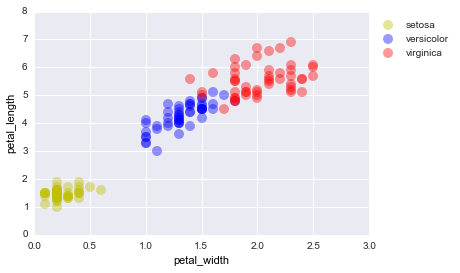

In [4]:
x1, x2 = features
colors = list("rby")
for spec in data.species.unique():
    data_spec = data[data.species == spec]
    plt.scatter(data_spec[x1], data_spec[x2], label=spec, c=colors.pop(),
                linewidths=0, s=100, alpha=.4)
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))
f = plt.xlabel(x1), plt.ylabel(x2), plt.xlim(0, 3), plt.ylim(0, 8)

### Non-linear boundaries
Let's use `sklearn`'s `PolynomialFeatures` again, to add polynomial features to $X$, before fitting the logistic regression model to it.

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree, overfitting_degree = 2, 100
model = make_pipeline(PolynomialFeatures(degree), LogisticRegression(C=overfitting_degree))
cross_val_score(model, X, y, cv=10).mean()

0.95999999999999996

Much better: just one degree higher – a quadratic boundary instead of a linear one – seems to make all the difference.

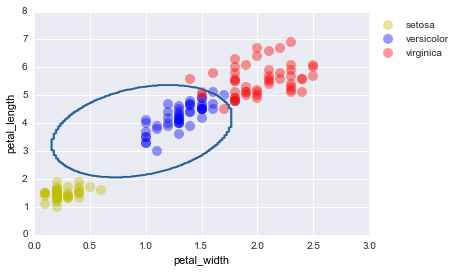

In [6]:
x1, x2 = features
colors = list("rby")

# Plot the flowers with color labels
for spec in data.species.unique():
    data_spec = data[data.species == spec]
    plt.scatter(data_spec[x1], data_spec[x2], label=spec, c=colors.pop(),
                linewidths=0, s=100, alpha=.4)

# Fit the model
model = make_pipeline(PolynomialFeatures(degree), LogisticRegression(C=overfitting_degree)).fit(X, y)

# draw the decision boundary
step_size, eps = .02, 1
xx1, xx2 = np.meshgrid(
    np.arange(X[x1].min() - eps, X[x1].max() + eps, step_size),
    np.arange(X[x2].min() - eps, X[x2].max() + eps, step_size))

yy = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
plt.contour(xx1, xx2, yy, cmap=plt.cm.Blues, alpha=.5)
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))
f = plt.xlabel(x1), plt.ylabel(x2), plt.xlim(0, 3), plt.ylim(0, 8)

Beautiful!